## Úloha 1: Programová implementace SIR modelu


In [49]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return dS_dt, dI_dt, dR_dt


In [ ]:
# Definice nemocí: název, R0, průměrná doba infekčnosti (ve dnech)
nemoci = [
    {'name': 'Chřipka ', 'R0': 1.3, 'dobaInfekce': 7},
    {'name': 'Spalničky ', 'R0': 15, 'dobaInfekce': 8},
    {'name': 'Plané neštovice ', 'R0': 10, 'dobaInfekce': 10},
    {'name': 'COVID-19', 'R0': 2.5, 'dobaInfekce': 10},
    {'name': 'Ebola', 'R0': 2.0, 'dobaInfekce': 14}
]

N = 1000
I0 = 1
R0_init = 0
S0 = N - I0 - R0_init
t = np.linspace(0, 160, 1601)
models = []
for nemoc in nemoci:
    R0_val = nemoc['R0']
    gamma = 1.0 / nemoc['dobaInfekce']
    beta = R0_val * gamma
    y0 = S0, I0, R0_init
    ret = odeint(sir_model, y0, t, args=(beta, gamma, N))
    S, I, R = ret.T
    models.append({'nemoc': nemoc['name'], 't': t, 'S': S, 'I': I, 'R': R})


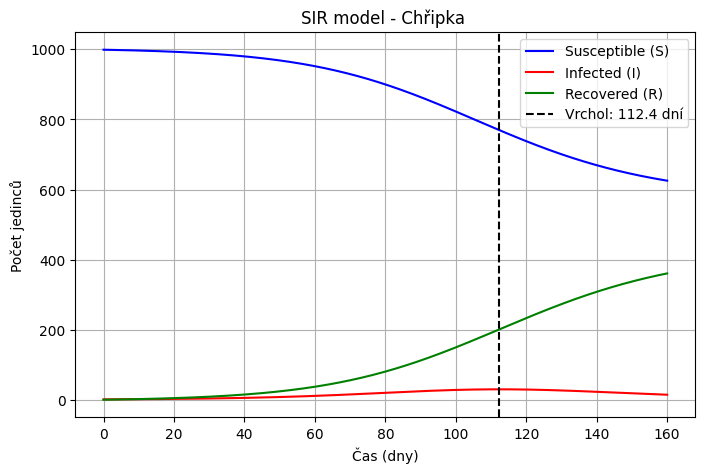

Nemoc: Chřipka 
1$ Epidemi dosáhne na vrchol po : 112.4 dnech.
2$ Konec epidemie (I < 1) bude po : 160.0 dnech.
3$ Počet nakažených: 361, počet 'zdravých': 4639.


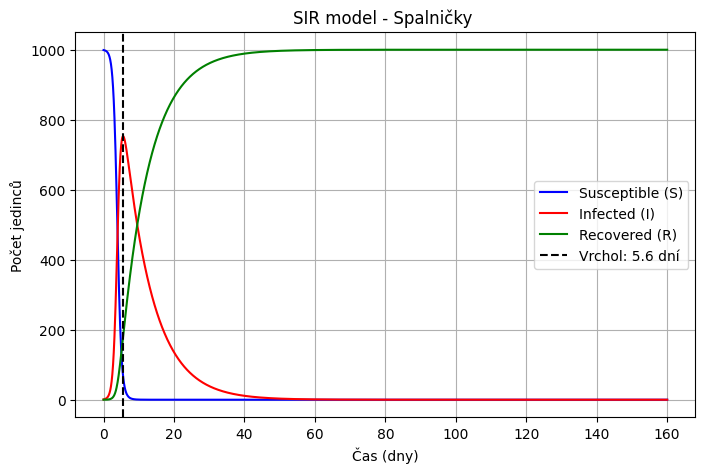

Nemoc: Spalničky 
1$ Epidemi dosáhne na vrchol po : 5.6 dnech.
2$ Konec epidemie (I < 1) bude po : 59.3 dnech.
3$ Počet nakažených: 1000, počet 'zdravých': 4000.


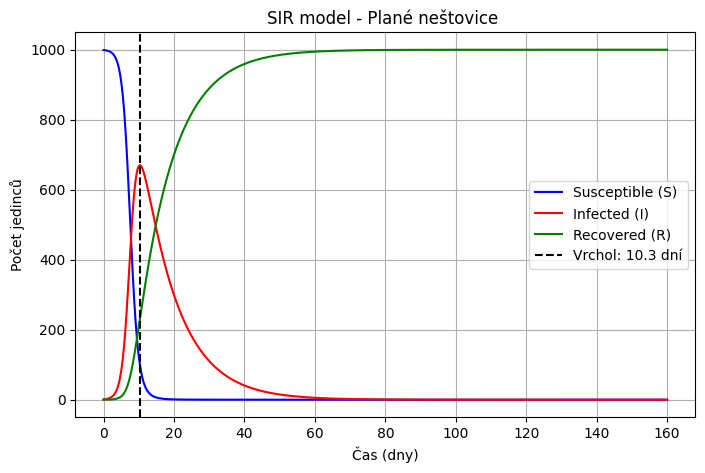

Nemoc: Plané neštovice 
1$ Epidemi dosáhne na vrchol po : 10.3 dnech.
2$ Konec epidemie (I < 1) bude po : 77.1 dnech.
3$ Počet nakažených: 1000, počet 'zdravých': 4000.


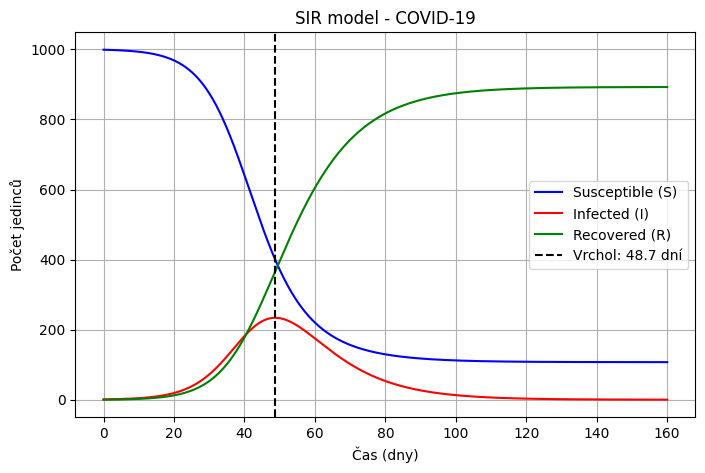

Nemoc: COVID-19
1$ Epidemi dosáhne na vrchol po : 48.7 dnech.
2$ Konec epidemie (I < 1) bude po : 135.4 dnech.
3$ Počet nakažených: 893, počet 'zdravých': 4107.


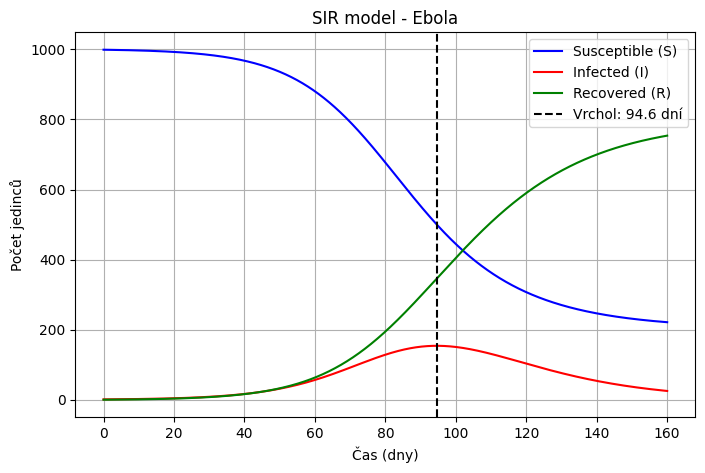

Nemoc: Ebola
1$ Epidemi dosáhne na vrchol po : 94.6 dnech.
2$ Konec epidemie (I < 1) bude po : 160.0 dnech.
3$ Počet nakažených: 754, počet 'zdravých': 4246.


In [ ]:
for model in models:
    name = model['nemoc']
    t = model['t']
    S, I, R = model['S'], model['I'], model['R']
    peak_idx = np.argmax(I)
    peak_time = t[peak_idx]
    end_idx = np.where(I < 1)[0]
    end_time = t[end_idx[0]] if len(end_idx) > 0 else t[-1]
    total_infected = R[-1]
    total_not_infected = N - total_infected
    plt.figure(figsize=(8, 5))
    plt.plot(t, S, 'b', label='Susceptible (S)')
    plt.plot(t, I, 'r', label='Infected (I)')
    plt.plot(t, R, 'g', label='Recovered (R)')
    plt.axvline(x=peak_time, color='k', linestyle='--', label=f'Vrchol: {peak_time:.1f} dní')
    plt.title(f'SIR model - {name}')
    plt.xlabel('Čas (dny)')
    plt.ylabel('Počet subjektů')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Sledovaný virus: {name}")
    print(f"1$ Epidemi dosáhne nejhoršího bodu : {peak_time:.1f} dnech.")
    print(f"2$ Konec epidemie (I < 1) bude po : {end_time:.1f} dnech.")
    print(f"3$ Počet nakažených: {total_infected:.0f}, počet nenakažených: {total_not_infected:.0f}.")


## Úloha 2: Ekologický model Lotka-Volterra
### Část 2.1: Základní model (1 kořist + 1 predátor)
Lotka-Volterra model se dvěma populacemi: kořist (x) a predátor (y):



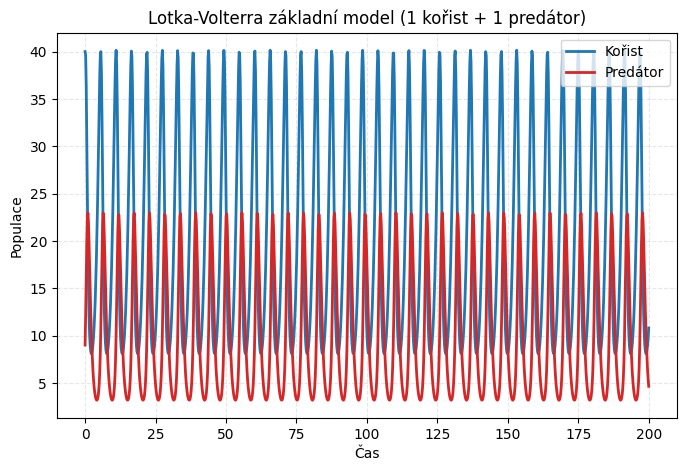

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

alpha = 1.0   # růst kořisti
beta  = 0.1   # predace
delta = 0.075 # růst predátora díky kořisti
gamma = 1.5   # úhyn predátora

x0 = 40  # jednotek kořistí
y0 = 9   # jednotek predátorů
initial_state = [x0, y0]

# Časový vektor
t = np.linspace(0, 200, 1000)

# Funkce pro ODE
def lv_basic(state, t, alpha, beta, delta, gamma):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Simulace
sol = odeint(lv_basic, initial_state, t, args=(alpha, beta, delta, gamma))
x = sol[:, 0]
y = sol[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(t, x, label='Kořist', color='tab:blue', linewidth=2)
plt.plot(t, y, label='Predátor', color='tab:red', linewidth=2)
plt.title('Lotka-Volterra základní model (1 kořist + 1 predátor)')
plt.xlabel('Čas')
plt.ylabel('Populace')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()


### Část 2.2: Rozšířený model (2 kořisti + 1 predátor)


In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def lv_two_prey_one_pred(state, t, alpha1, beta1, alpha2, beta2, delta1, delta2, gamma):
    x1, x2, y = state
    dx1dt = alpha1 * x1 - beta1 * x1 * y
    dx2dt = alpha2 * x2 - beta2 * x2 * y
    dydt = delta1 * x1 * y + delta2 * x2 * y - gamma * y
    return [dx1dt, dx2dt, dydt]


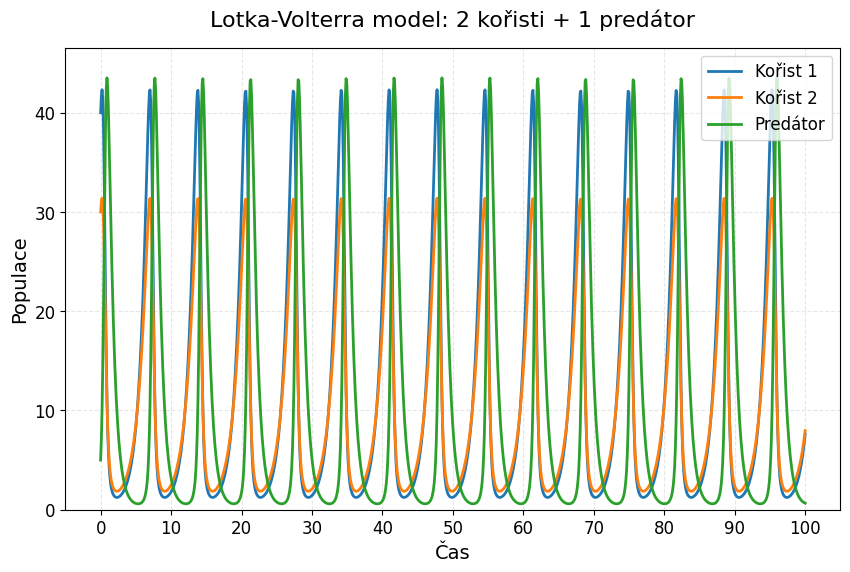

In [ ]:
alpha1 = 1.00   # růst Kořist 1
beta1  = 0.10   # predace na Kořist 1
alpha2 = 0.80   # růst Kořist 2
beta2  = 0.08   # predace na Kořist 2
delta1 = 0.075  # růst predátora z Kořist 1
delta2 = 0.060  # růst predátora z Kořist 2
gamma  = 1.50   # úhyn predátora

x1_0 = 40   # # jednotek obětí (zajíců)
x2_0 = 30   # jednotek obětí (srnek)
y_0  = 5    # jednotek predátorů
initial_state = [x1_0, x2_0, y_0]

# Časový vektor
t = np.linspace(0, 100, 1000)

# Simulace
sol = odeint(lv_two_prey_one_pred, initial_state, t,
             args=(alpha1, beta1, alpha2, beta2, delta1, delta2, gamma))
x1 = sol[:, 0]
x2 = sol[:, 1]
y  = sol[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(t, x1, label='Kořist 1', color='tab:blue', linewidth=2)
plt.plot(t, x2, label='Kořist 2', color='tab:orange', linewidth=2)
plt.plot(t, y,  label='Predátor',  color='tab:green', linewidth=2)
plt.title('Lotka-Volterra model: 2 kořisti + 1 predátor', fontsize=16, pad=15)
plt.xlabel('Čas', fontsize=14)
plt.ylabel('Populace', fontsize=14)
plt.ylim(0, max(x1.max(), x2.max())*1.1)
plt.legend(loc='upper right', fontsize=12, framealpha=0.8)
plt.grid(alpha=0.3, linestyle='--')
plt.xticks(np.arange(0, 101, 10), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Úloha 3: Monte Carlo simulace úspěchu filmu na základě ratingu
Simuluji \(N\) potenciálních diváků, kteří mají náhodné preference (0–10).
Rating od kritiků ovlivní pravděpodobnost, že divák půjde do kina:

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 5000          # počet potenciálních diváků
T = 30            # simulace v dnech
mu_rating = 7.0   # střední hodnota hodnocení od kritiků
sigma_rating = 1.0 # směrodatná odchylka hodnocení
price_ticket = 200  # cena vstupenky (v korunách)

# Generování ratingu od kritiků
crit_rating = np.clip(np.random.normal(mu_rating, sigma_rating), 0, 10)
# Generování preferencí diváků
preferences = np.random.uniform(0, 10, N)

print(f"Rating od kritiků: {crit_rating:.2f}")

Rating od kritiků: 7.41


### Monte Carlo simulace
Každý den simulace vypočítáme počet návštěvníků a tržby za vstupenky:


In [90]:
daily_visits = np.zeros(T, dtype=int)
daily_revenue = np.zeros(T, dtype=float)
for day in range(T):
    count_visitors = 0
    for i in range(N):
        diff = abs(preferences[i] - crit_rating)
        p_go = max(0, (10 - diff) / 10) * 0.2
        if random.random() < p_go:
            count_visitors += 1
    daily_visits[day] = count_visitors
    daily_revenue[day] = count_visitors * price_ticket
# daily_visits, daily_revenue

### Výsledky simulace
Grafy denní návštěvnosti a denních tržeb.

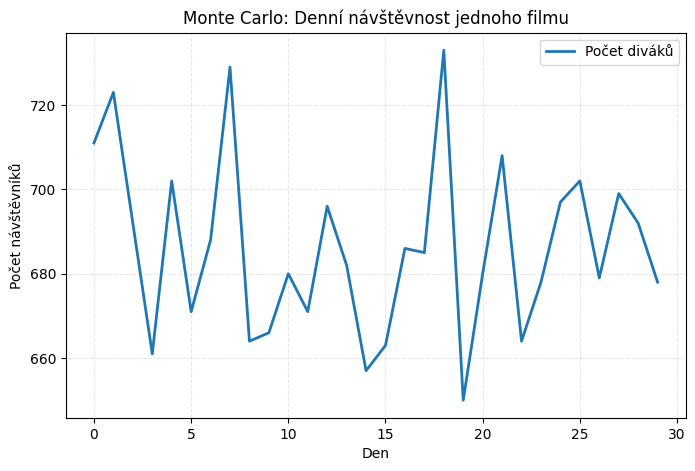

In [91]:
plt.figure(figsize=(8, 5))
plt.plot(range(T), daily_visits, label='Počet diváků', color='tab:blue', linewidth=2)
plt.title('Monte Carlo: Denní návštěvnost jednoho filmu')
plt.xlabel('Den')
plt.ylabel('Počet návštěvníků')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.show()


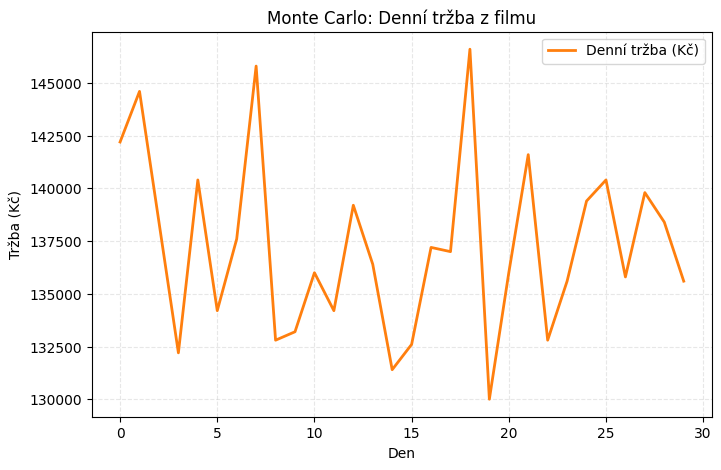

In [92]:
plt.figure(figsize=(8, 5))
plt.plot(range(T), daily_revenue, label='Denní tržba (Kč)', color='tab:orange', linewidth=2)
plt.title('Monte Carlo: Denní tržba z filmu')
plt.xlabel('Den')
plt.ylabel('Tržba (Kč)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.show()


Denní návštěvnost kolísá kolem průměru cca 700 diváků z 5000, protože každý den se náhodně rozhoduje, zda mu jeho preferenční hodnota a kritikův rating sedí. S tím souvisejí i tržby, které v průměru dosahují kolem 140 000 Kč, ale mohou se denně pohybovat v rozmezí 130–147 tisíc Kč. I při stabilním hodnocení se objeví fluktuace, protože každý jedinec generuje nezávislý náhodný pokus „půjdu/nepůjdu“. Tento model ukazuje, jak jednoduché Monte Carlo dokáže zachytit reálnou nejistotu návštěvnosti i tržeb.